In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


76


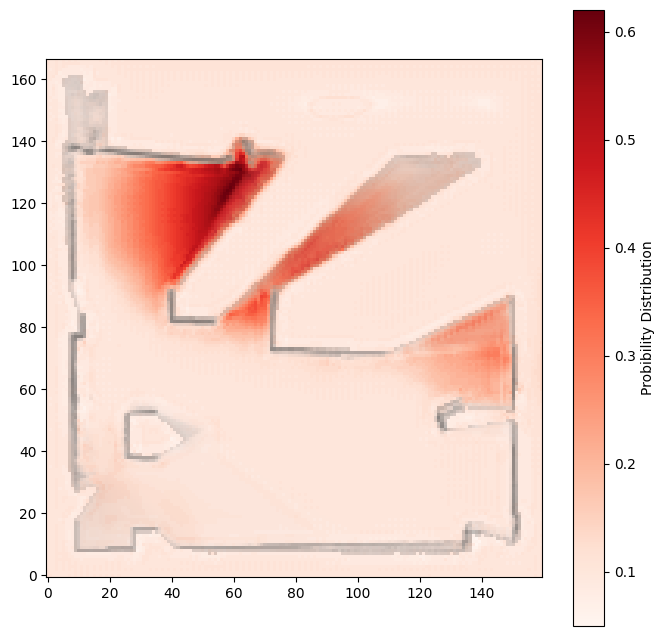

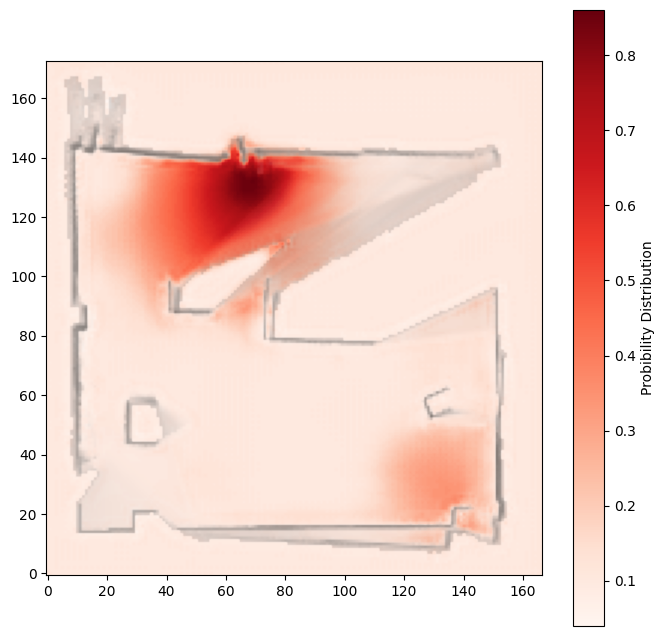

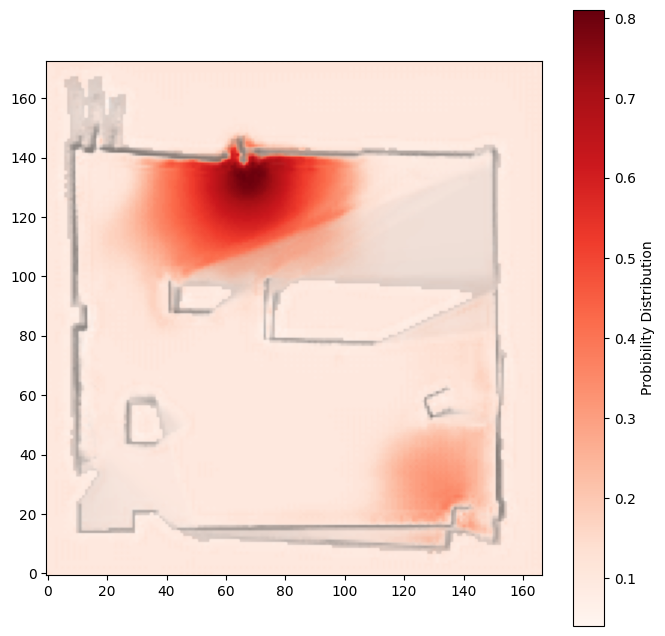

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
def read_map_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    resolution = float(lines[0].split(': ')[1])
    width = int(lines[1].split(': ')[1])
    height = int(lines[2].split(': ')[1])

    origin_x = float(lines[4].split(': ')[1])
    origin_y = float(lines[5].split(': ')[1])

    data_start_index = lines.index('Data:\n') + 1
    data = []
    for line in lines[data_start_index:]:
        data.extend([int(value) for value in line.split()])

    data = np.array(data, dtype=np.float32).reshape((height, width))
    return resolution, width, height, data, {'x': origin_x, 'y': origin_y}


def read_gassource_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        if 'translation:' in line:
            x = float(lines[lines.index(line) + 1].split(': ')[1])
            y = float(lines[lines.index(line) + 2].split(': ')[1])
            break

    return x, y

def f(x):#loss function threshold
    a = 3
    b = 0.3
    c = 1
    return a * np.exp(-b * (x-1)) + c


def convert_coordinates(x, y, resolution, origin):
    x_map = (x - origin['x']) / resolution
    y_map = (y - origin['y']) / resolution
    return x_map, y_map


def process_map_file(map_file, gas_x, gas_y, output_file, D):
    resolution, width, height, data, origin = read_map_file(map_file)


    gas_x_map, gas_y_map = convert_coordinates(gas_x, gas_y, resolution, origin)

    d=f(D)
    for y in range(height):
        for x in range(width):
            distance = np.sqrt((x - gas_x_map) ** 2 + (y - gas_y_map) ** 2) * resolution

            if distance > d or data[y, x]== -1:
                data[y, x] = 0.0
            else:

                o=data[y, x]
                data[y, x] = ((d-distance)/d)*(100-o)/100


    write_map_file(output_file, resolution, width, height, data, origin)


def write_map_file(file_path, resolution, width, height, data, origin):
    with open(file_path, 'w') as file:
        file.write(f"Resolution: {resolution}\n")
        file.write(f"Width: {width}\n")
        file.write(f"Height: {height}\n")
        file.write("Origin: position: \n")
        file.write(f"  x: {origin['x']}\n")
        file.write(f"  y: {origin['y']}\n")
        file.write("  z: 0.0\n")
        file.write("orientation: \n")
        file.write("  x: 0.0\n")
        file.write("  y: 0.0\n")
        file.write("  z: 0.0\n")
        file.write("  w: 1.0\n")
        file.write("Data:\n")

        for row in data:
            file.write(" ".join(f"{value:.2f}" for value in row) + "\n")


def visualize_label_map(file_path,mappath,save=False):
    resolution, width, height, mapdata,origin = read_map_file(mappath)





    with open(file_path, 'r') as file:
        lines = file.readlines()

    width = int(lines[1].split(': ')[1])
    height = int(lines[2].split(': ')[1])

    data_start_index = lines.index('Data:\n') + 1
    data = []
    for line in lines[data_start_index:]:
        data.extend([float(value) for value in line.split()])

    data = np.array(data).reshape((height, width))

    plt.figure(figsize=(8, 8))
    data_viz = np.copy(mapdata)
    data_viz[data == -1] = np.nan




    plt.imshow(data, cmap='Reds', origin='lower', alpha=1)
    plt.colorbar(label='Probibility Distribution')


    alpha_values = np.clip(data_viz * 0.005, 0, 1)

    im = plt.imshow(data_viz, cmap='gray_r', origin='lower',alpha=alpha_values)
    plt.imshow(np.where(np.isnan(data_viz), 0, np.nan), cmap=mcolors.ListedColormap(['black']), origin='lower')

    if save:
        output_path = file_path.replace('.txt', '_visualization.png')
        plt.savefig(output_path, dpi=300)
    plt.show()
    plt.close()



def vis_result(epoch_num):
    base_folder_path = r'/content/drive/MyDrive/OSLAM_result/windchange/'#change to local path
    folder_name = f'epoch{epoch_num}'
    folder_path = os.path.join(base_folder_path, folder_name)

    result_files = sorted([f for f in os.listdir(folder_path) if re.match(r'^result\d+\.txt$', f)])
    map_files = sorted([f for f in os.listdir(folder_path) if re.match(r'^map\d+\.txt$', f)])

    for i in range(len(result_files)):
        #index = result.split('map')[-1].split('.')[0]
        #result_file_path = os.path.join(folder_path, result)
        result_path = os.path.join(folder_path, result_files[i])
        map_path = os.path.join(folder_path, map_files[i])



        visualize_label_map(result_path,map_path)
if __name__ == "__main__":
    for i in range(76,77):
      print(i)

      vis_result(i)
